In [1]:
listaP=[("Coruña",1120000),
       ("Lugo",333000),
       ("Ourense",310000),
       ("Pontevedra",940000)]

In [2]:
pob=spark.createDataFrame(listaP,
            ["Provincia","Población"])

In [3]:
pob.printSchema(),pob.show()

root
 |-- Provincia: string (nullable = true)
 |-- Población: long (nullable = true)

+----------+---------+
| Provincia|Población|
+----------+---------+
|    Coruña|  1120000|
|      Lugo|   333000|
|   Ourense|   310000|
|Pontevedra|   940000|
+----------+---------+



(None, None)

In [4]:
listaS=[("Coruña",7950),
       ("Lugo",9800),
       ("Ourense",7200),
       ("Pontevedra",4400)]
sup=spark.createDataFrame(listaS,["Provincia","Superficie"])
sup.printSchema(),sup.show()

root
 |-- Provincia: string (nullable = true)
 |-- Superficie: long (nullable = true)

+----------+----------+
| Provincia|Superficie|
+----------+----------+
|    Coruña|      7950|
|      Lugo|      9800|
|   Ourense|      7200|
|Pontevedra|      4400|
+----------+----------+



(None, None)

In [5]:
combinado=pob.join(sup,"Provincia")
combinado.show()

+----------+---------+----------+
| Provincia|Población|Superficie|
+----------+---------+----------+
|    Coruña|  1120000|      7950|
|      Lugo|   333000|      9800|
|   Ourense|   310000|      7200|
|Pontevedra|   940000|      4400|
+----------+---------+----------+



In [6]:
conDensidad=combinado.withColumn("Densidad",
    combinado["Población"]/combinado["Superficie"])
conDensidad.show()

+----------+---------+----------+------------------+
| Provincia|Población|Superficie|          Densidad|
+----------+---------+----------+------------------+
|    Coruña|  1120000|      7950|140.88050314465409|
|      Lugo|   333000|      9800| 33.97959183673469|
|   Ourense|   310000|      7200| 43.05555555555556|
|Pontevedra|   940000|      4400|213.63636363636363|
+----------+---------+----------+------------------+



In [7]:
pand=conDensidad\
    .orderBy(conDensidad.Densidad.desc()).toPandas()
pand

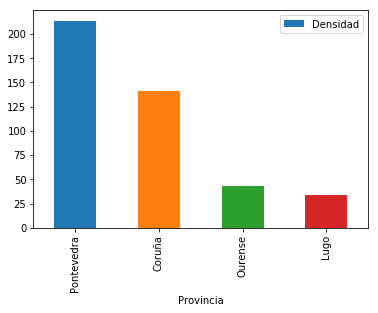

In [9]:
pand.plot.bar(x="Provincia",y="Densidad")

In [10]:
from autovizwidget.widget.utils import display_dataframe

display_dataframe(pand)

Output()

AutoVizWidget()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd5431ce10>,
      dtype=object)

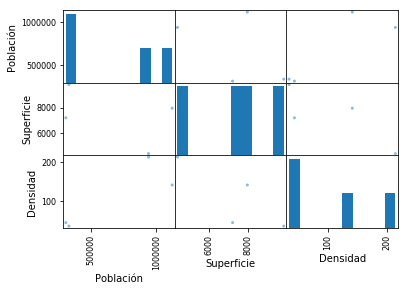

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(pand)

In [30]:
conDensidad.corr("Población","Superficie")

-0.46406749351217397

In [31]:
conDensidad.corr("Población","Densidad")

0.8593605582615457